# 🧠 Stroke Prediction: Machine Learning Classification

Strokes are a leading cause of disability and mortality worldwide, often striking without warning and leaving devastating impacts on patients' lives. Timely and accurate prediction of stroke risks is a crucial step in mitigating these outcomes and providing life-saving interventions.

In this project, we harness the power of machine learning to develop robust classification models capable of predicting the risk of stroke. By analyzing patient data such as demographic profiles, medical history, lifestyle factors, and clinical measurements, our goal is to uncover critical patterns and enhance decision-making for healthcare professionals.

### **Objectives**
- Analyze and preprocess diverse patient data to identify key predictors of stroke.
- Engineer features and optimize datasets for improved model performance.
- Develop and evaluate multiple classification models, focusing on metrics like recall, precision, and AUC-ROC to ensure reliable predictions.
- Bridge the gap between predictive analytics and real-world healthcare applications.

### **About the Dataset**
This study utilizes data from [Kaggle Playground Series Season 3 Episode 2](https://www.kaggle.com/competitions/playground-series-s3e2), which includes a wide array of features related to patient health and lifestyle. Addressing challenges such as imbalanced classes and complex feature interactions, this dataset provides a rich environment for exploring innovative machine learning techniques.

# Importing the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import BorderlineSMOTE
from xgboost import XGBClassifier

# Importing the data

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')

# Importing the data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
df.shape

(15304, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


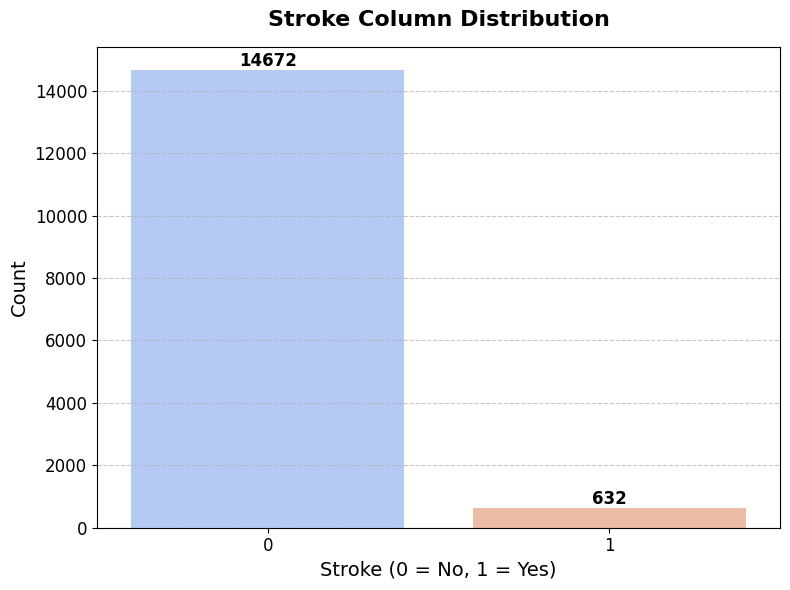

In [6]:
#stroke column plot
stroke_counts = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette="coolwarm")
for i in range(len(stroke_counts)):
    plt.text(i, stroke_counts.values[i], str(stroke_counts.values[i]),
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Stroke Column Distribution', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

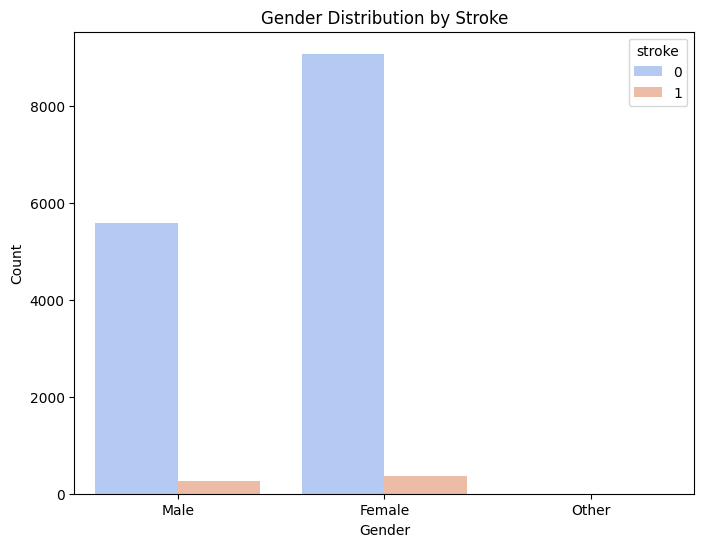

In [7]:
#gender vs stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke', palette='coolwarm')
plt.title('Gender Distribution by Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

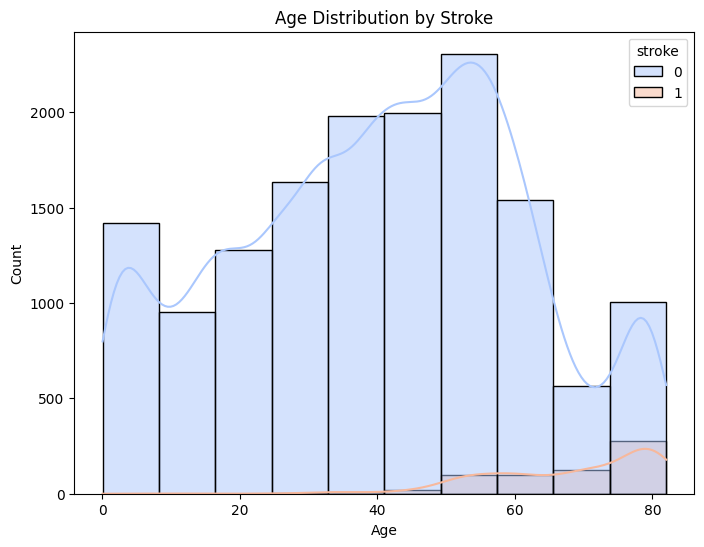

In [8]:
#age vs stroke
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=10, palette='coolwarm')
plt.title('Age Distribution by Stroke')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

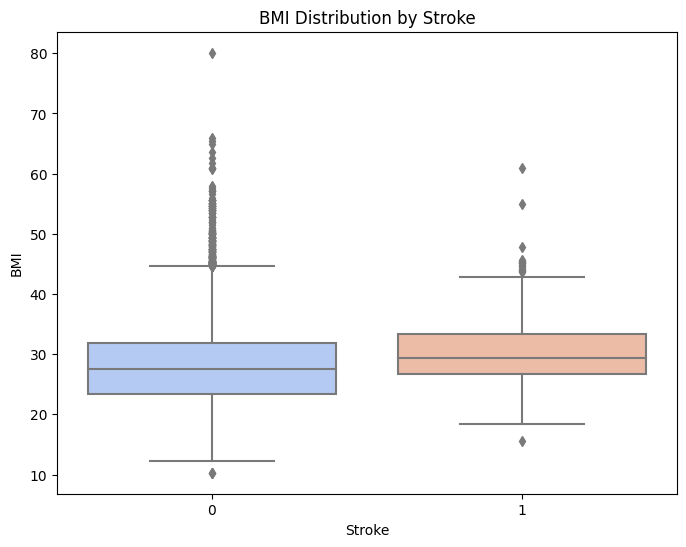

In [9]:
#BMI vs stroke
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='bmi', palette='coolwarm')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

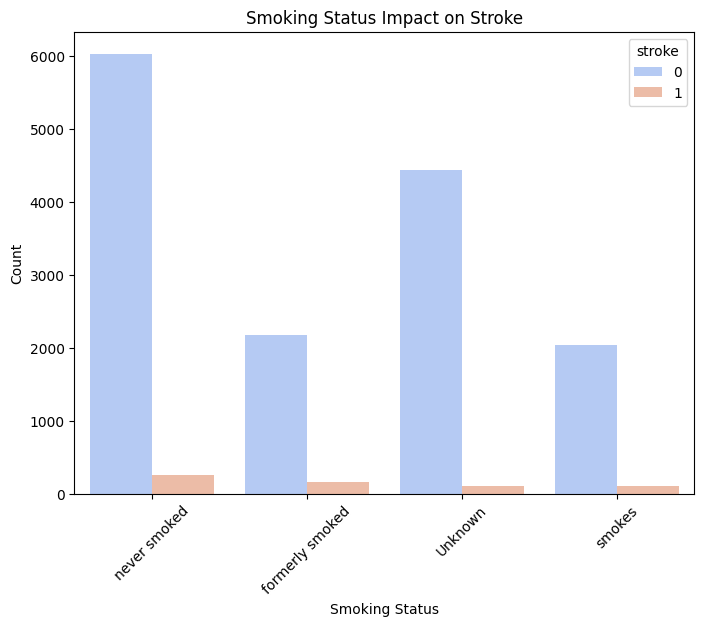

In [10]:
#smoking status ve stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='coolwarm')
plt.title('Smoking Status Impact on Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

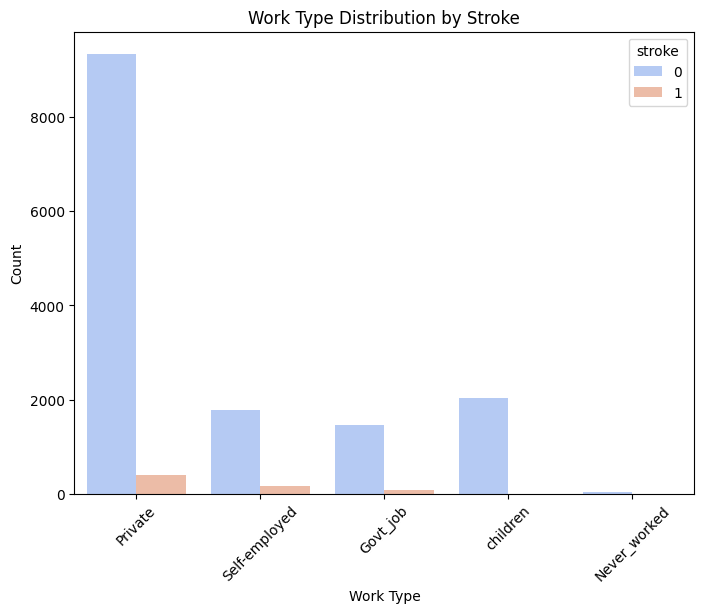

In [11]:
#work type vs stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='work_type', hue='stroke', palette='coolwarm')
plt.title('Work Type Distribution by Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

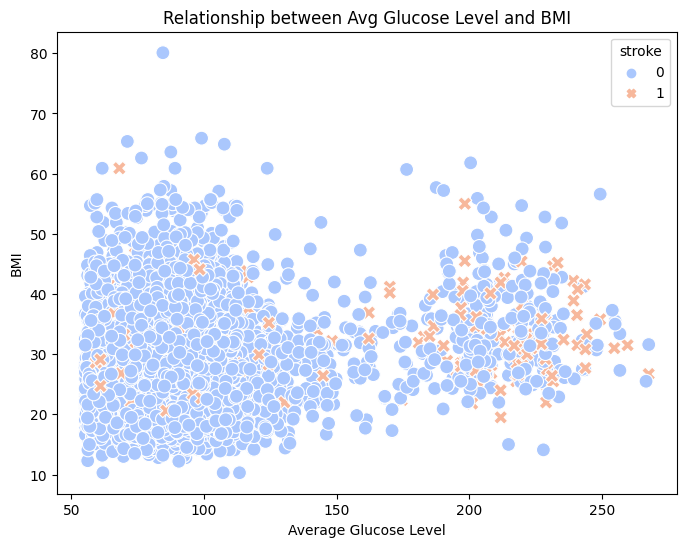

In [ ]:
#avg_glucose_level vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', style='stroke', palette='coolwarm', s=100)
plt.title('Relationship between Avg Glucose Level and BMI')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

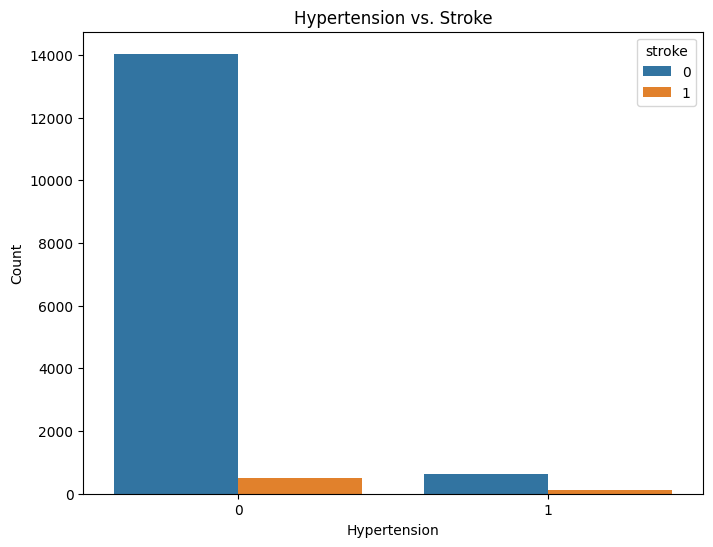

In [13]:
#hypertension vs stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title('Hypertension vs. Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

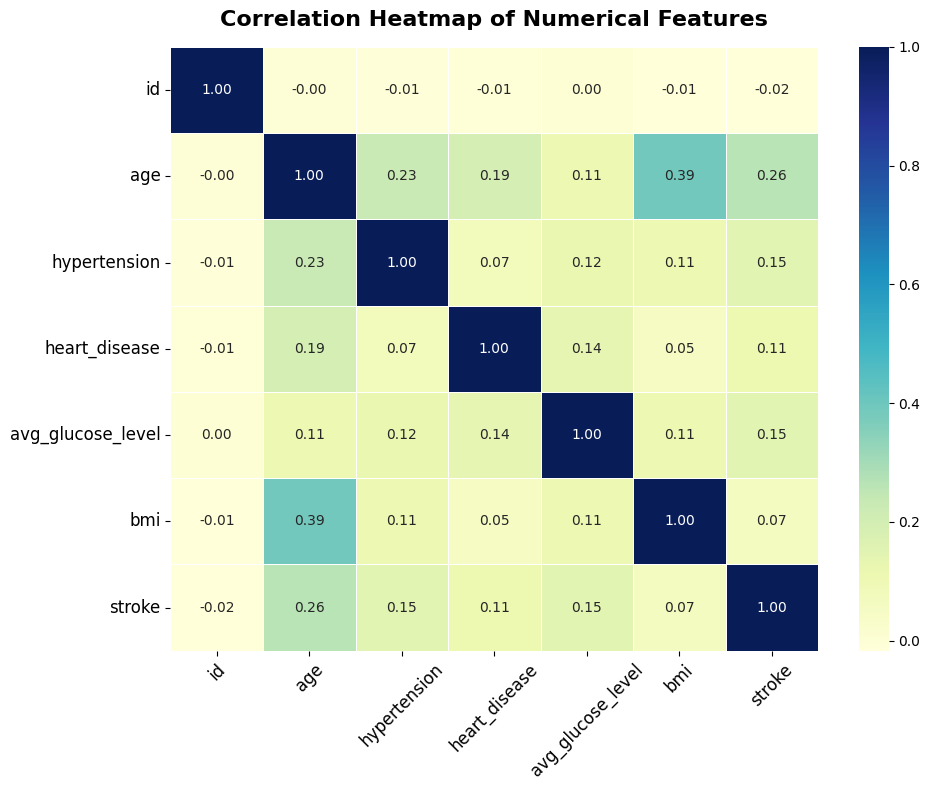

In [14]:
#correlation heatmap of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Modelling

In [16]:
x = df.drop(columns=['stroke'])
y = df['stroke']

x = pd.get_dummies(x, drop_first=True)

#combining x and y for easier manipulation
data = pd.concat([x, y], axis=1)

In [17]:
#separating majority and minority classes
majority = data[data['stroke'] == 0]
minority = data[data['stroke'] == 1]

#undersampling the majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

#combining the undersampled majority class with the minority class
balanced_data = pd.concat([majority_downsampled, minority])

#applying borderline-SMOTE to both classes for augmentation
x_balanced = balanced_data.drop(columns=['stroke'])
y_balanced = balanced_data['stroke']

smote = BorderlineSMOTE(random_state=42)
x_augmented, y_augmented = smote.fit_resample(x_balanced, y_balanced)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

#defining the classifiers with initial hyperparameters
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=500),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=5, learning_rate=0.1),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}


In [19]:
#results container
results = {}
roc_curves = []

#training the models
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else None
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "AUC-ROC": auc
    }
    
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves.append((name, fpr, tpr, auc))


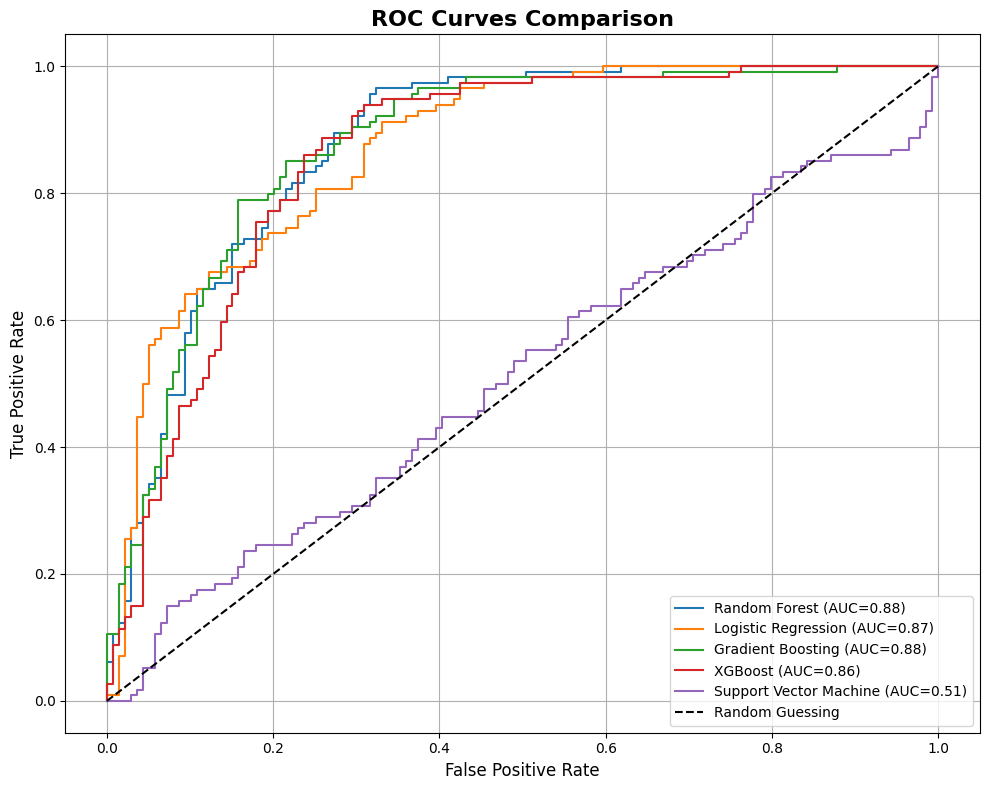

In [20]:
#plot ROC Curves
plt.figure(figsize=(10, 8))
for name, fpr, tpr, auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
#classification reports
for name, res in results.items():
    print(f"\n{name} Results:")
    print(f"Classification Report:\n{pd.DataFrame(res['Classification Report'])}")
    print(f"AUC-ROC: {res['AUC-ROC']:.2f}")


Random Forest Results:
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.898148    0.710345  0.790514    0.804246      0.813525
recall       0.697842    0.903509  0.790514    0.800675      0.790514
f1-score     0.785425    0.795367  0.790514    0.790396      0.789905
support    139.000000  114.000000  0.790514  253.000000    253.000000
AUC-ROC: 0.88

Logistic Regression Results:
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.822581    0.713178  0.766798    0.767879      0.773285
recall       0.733813    0.807018  0.766798    0.770415      0.766798
f1-score     0.775665    0.757202  0.766798    0.766434      0.767346
support    139.000000  114.000000  0.766798  253.000000    253.000000
AUC-ROC: 0.87

Gradient Boosting Results:
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.865079    0.763780  0.814229    0.81

In [23]:
#continuing with the gradient boosting model, which performed the best for both classes
gb = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5)
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
y_prob = gb.predict_proba(x_test)[:, 1]

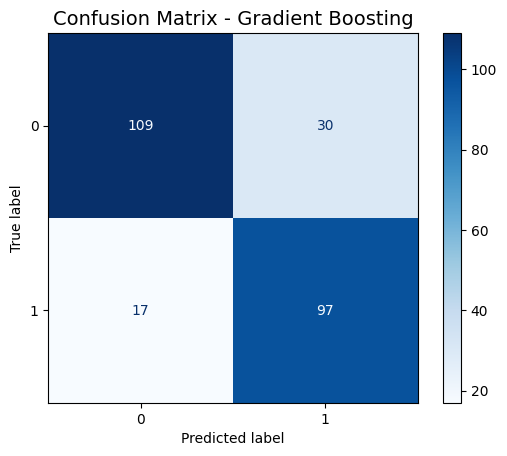

In [24]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting", fontsize=14)
plt.show()

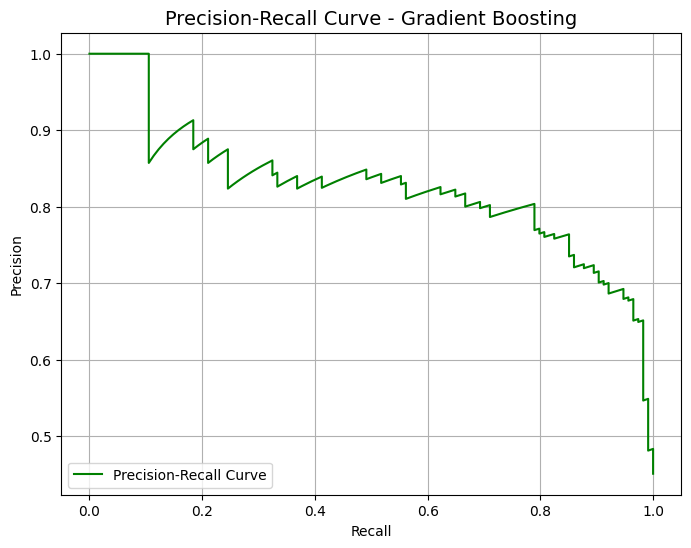

In [26]:
#precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
plt.title("Precision-Recall Curve - Gradient Boosting", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [27]:
#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       139
           1       0.76      0.85      0.80       114

    accuracy                           0.81       253
   macro avg       0.81      0.82      0.81       253
weighted avg       0.82      0.81      0.81       253



# 🎯 Conclusion: Stroke Prediction Model

In this project, we explored various machine learning algorithms, including **Random Forest**, **Logistic Regression**, **Gradient Boosting**, **XGBoost**, and **Support Vector Machine**, to predict the likelihood of a stroke based on a comprehensive dataset. After rigorous evaluation, **Gradient Boosting** emerged as the top-performing model, offering the best balance of precision and recall for both classes.

To address the **class imbalance** issue inherent in the dataset, we adopted a two-step strategy:
1. **Undersampling** the majority class to equalize the representation of both classes.
2. Applying **data augmentation** techniques to further enrich the dataset with diverse patterns. Traditional oversampling alone did not yield the desired improvements, leading us to this innovative approach.

### Final Results:
The Gradient Boosting model achieved the following performance metrics:
- **Accuracy:** 81%
- **AUC-ROC:** 88%
- **Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.87      | 0.78   | 0.82     | 139     |
| **1** | 0.76      | 0.85   | 0.80     | 114     |

These results highlight the model’s ability to balance predictive power for both positive and negative outcomes.

### Key Contributions:
- Conducted **exploratory data analysis** to understand feature distributions, relationships, and anomalies.
- Visualized the data and results extensively to gain insights into model performance and decision boundaries.
- Implemented a structured approach to deal with imbalanced data, achieving robust results with Gradient Boosting.